In [1]:
# %load_ext autoreload
%reload_ext autoreload
%autoreload 2
import numpy as np

from src.GridWorldMDP.objectworld_utils import draw_path, generate_demonstrations, init_object_world, visitation_frequency
from src.deepmaxent_irl_objectworld import run_deepmaxent_irl
from src.maxent_irl_objectworld import run_maxent_irl
from src.img_utils import Visualizer, get_evd, draw_evd
from src.argument_parser import get_parser, parse_args_str

PARSER = get_parser()

In [2]:
q_values = np.random.randint(0, 10, (3, 3))
np.max(q_values[0])

8

In [3]:
np.random.seed(1)
BASIC_ARGS = """
--exp_name test
--height 6
--n_objects 7
--n_colours 3
--seed 1
"""
args = parse_args_str(PARSER, BASIC_ARGS)
print(args.exp_name)

init_start_pos = np.random.randint(0, args.height, size=(args.n_query, 2)).tolist()
print('start positions: ', init_start_pos)

ow, P_a, rewards_gt, values_gt, policy_gt, feat_map = init_object_world(args)
ow.grid

test
start positions:  [[5, 3]]
[INFO] Initialize Object World
[INFO] Getting ground truth values and policy via value iteration


array([[-1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.]])

In [4]:
ow.objects

{(0, 1): <OWObject (In: 1) (Out: 0)>,
 (4, 5): <OWObject (In: 1) (Out: 0)>,
 (1, 2): <OWObject (In: 0) (Out: 2)>,
 (5, 2): <OWObject (In: 0) (Out: 2)>,
 (2, 4): <OWObject (In: 0) (Out: 0)>,
 (1, 1): <OWObject (In: 1) (Out: 2)>,
 (5, 1): <OWObject (In: 2) (Out: 0)>}

In [5]:
feat_map.shape

(36, 6)

## Maxent

In [ ]:
MAXENT_ARGS = """
--exp_name maxent_rand
--type object
--n_objects 7
--n_colours 4
--height 6
--width 6
--gamma 0.8
--act_random 0.3
--n_trajs 5
--l_traj 6
--learning_rate 0.1
--n_iters 10
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 0.5
--active
"""
args = parse_args_str(PARSER, MAXENT_ARGS)
print(args.exp_name)

history_maxent_active = run_maxent_irl(args, init_start_pos=init_start_pos)

In [ ]:
visualizer = Visualizer(history_maxent_active, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)
visualizer.draw_acq_maps(search_idx)

---

## Deep Maxent

In [ ]:
init_start_pos

In [10]:
DEEP_MAXENT_ACTIVE_ARGS = """
--exp_name deepmaxent_active
--type object
--n_objects 7
--n_colours 2
--height 6
--width 6
--gamma 0.9
--act_random 0.3
--n_trajs 10
--l_traj 8
--learning_rate 0.01
--n_iters 50
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 1.0
--weight_decay 0.01
--hiddens 3 3
--device cuda
--active
--seed 1
--verbose 2
"""

# becareful of learning rate will cause nan
args = parse_args_str(PARSER, DEEP_MAXENT_ACTIVE_ARGS)
print(args.exp_name)
history_deepmaxent_active = run_deepmaxent_irl(args, init_start_pos=init_start_pos)

deepmaxent_active
[INFO] Initialize Object World
[INFO] Getting ground truth values and policy via value iteration
[INFO] Initialize trajectories
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 6 2 0 0]]
[INFO - n_trajs:1] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:1--
[[-1.988  -1.3846 -0.8499 -0.3623 -0.0654 -1.2601]
 [-2.2088 -1.0309 -0.447   0.2112 -0.6293 -1.9861]
 [-2.4134 -1.3935 -0.1765 -0.251  -1.4595 -2.7597]
 [-3.4358 -1.8755  0.1198  0.1546 -1.176  -3.549 ]
 [-3.7242 -0.8354  1.9821  1.1773 -0.6309 -2.3798]
 [-2.0814  1.2324  2.7104  2.0048  1.2672 -0.7422]]
[INFO - n_trajs:1] Policy evaluation
-- evd = 0.599098 ---
[INFO - n_trajs:1] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:1--
[[0.5717 0.8222 0.8306 0.6246 1.4096 0.9453]
 [0.2901 0.375  0.3473 0.3864 0.4954 0.4525]
 [0.182  0.2404 0.2719 0.4006 0.5321 0.4659]
 [0.2646 0.427  0.381  0.6146 1.1242 0.9899]
 [0.2922 0.4598 0.5285 0.869  1.5764 1.6809]
 [0.2866 0.4536 0.7236 1.0686 0.9021 0.8226]]
[INFO - n_trajs:1] Generating a new demonstrations from [(4, 5)]
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 6 2 1 6]]
[INFO - n_trajs:2] Training Deep MaxEnt 

  0%|          | 0/50 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:2--
[[5.5456 4.2657 4.9472 5.695  6.6101 7.1197]
 [5.3041 5.1441 5.0577 5.4781 5.6235 6.086 ]
 [5.3711 5.566  5.8129 5.4854 4.6682 5.2483]
 [4.2433 4.7619 5.7167 5.0749 4.0113 3.3749]
 [1.9675 3.8796 5.3123 5.1271 4.6708 4.7143]
 [4.0301 4.4514 5.2205 5.0968 4.5099 5.3998]]
[INFO - n_trajs:2] Policy evaluation
-- evd = 4.070192 ---
[INFO - n_trajs:2] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:2--
[[3.1481 1.1047 0.6697 0.5964 0.5073 0.3035]
 [3.4224 1.7091 1.4135 1.549  0.797  0.3261]
 [2.8209 2.2248 2.3896 1.3665 0.6951 0.3412]
 [2.3572 2.5642 1.9771 1.2247 0.8601 0.5964]
 [2.0867 2.1329 1.6933 1.5604 2.3266 2.0122]
 [1.2317 1.5503 2.1011 2.4276 3.6459 2.8853]]
[INFO - n_trajs:2] Generating a new demonstrations from [(5, 4)]
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 1]
 [0 2 8 3 3 6]]
[INFO - n_trajs:3] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:3--
[[13.0033  9.3106 10.5316 11.9469 13.9416 15.3471]
 [12.6615 11.1466 10.4921 11.0168 11.1633 12.519 ]
 [12.8834 12.4979 12.0919 10.8365  8.5423 10.3859]
 [10.1506 10.3609 11.8608  9.9083  7.1323  6.8795]
 [ 6.1638  7.8442  9.7942 10.211   9.0298  9.597 ]
 [ 8.8103  8.275   8.4012  9.9102  8.1853 10.6584]]
[INFO - n_trajs:3] Policy evaluation
-- evd = 5.609951 ---
[INFO - n_trajs:3] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:3--
[[2.0766 1.7632 0.4978 0.1857 0.0541 0.0192]
 [2.5762 1.7189 0.927  0.5676 0.1296 0.0352]
 [2.1168 1.7993 2.1018 0.6301 0.1946 0.0676]
 [1.2866 1.1593 1.2229 0.5645 0.3781 0.1744]
 [0.7412 0.6954 0.7342 0.6278 1.4741 0.5748]
 [0.4812 0.4497 0.5004 0.7626 2.4688 1.5947]]
[INFO - n_trajs:3] Generating a new demonstrations from [(1, 0)]
Visitation Frequency
[[2 0 0 0 0 0]
 [2 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 1 0 0 0 0]
 [0 1 0 0 1 1]
 [0 2 8 3 3 6]]
[INFO - n_trajs:4] Training Deep MaxEnt 

  0%|          | 0/50 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:4--
[[23.1162 17.4382 17.0886 17.5169 19.4591 21.226 ]
 [21.5793 18.5049 15.7888 14.6971 13.6079 15.608 ]
 [20.3287 19.2479 17.2067 13.3554  7.6368 11.6748]
 [14.7792 14.7557 17.0268 12.3838  6.0926  6.6926]
 [ 8.551  10.4834 13.475  14.0718 11.0824 11.8079]
 [12.268  10.9962 10.9415 13.276   8.3075 12.9624]]
[INFO - n_trajs:4] Policy evaluation
-- evd = 6.625943 ---
[INFO - n_trajs:4] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:4--
[[0.009  0.0146 0.0209 0.0331 0.0166 0.008 ]
 [0.0213 0.0513 0.0618 0.1316 0.0314 0.0105]
 [0.0558 0.2312 0.1384 0.0986 0.0398 0.0182]
 [0.0544 0.1352 0.109  0.1166 0.0897 0.0558]
 [0.0419 0.0856 0.1153 0.3357 0.2159 0.2264]
 [0.0297 0.0574 0.0958 0.2155 0.2056 0.4152]]
[INFO - n_trajs:4] Generating a new demonstrations from [(5, 5)]
Visitation Frequency
[[2 0 0 0 0 0]
 [2 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 1 0 0 0 0]
 [0 1 0 0 1 1]
 [0 2 8 5 7 8]]
[INFO - n_trajs:5] Training Deep MaxEnt 

  0%|          | 0/50 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:5--
[[11.9189  8.6228  9.4504 10.6194 12.4435 14.0877]
 [11.4556 10.0628  9.2983  9.6491 10.0176 11.6932]
 [11.552  11.1328 10.7198  9.6123  7.8731 10.0384]
 [ 9.5433  9.3409 10.4337  8.6468  6.4972  7.0634]
 [ 6.2258  6.8818  8.305   8.6522  8.0351  9.0032]
 [ 7.9841  7.0147  6.6697  8.0115  6.7822  9.5741]]
[INFO - n_trajs:5] Policy evaluation
-- evd = 5.766295 ---
[INFO - n_trajs:5] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:5--
[[1.1466 0.8745 0.465  0.2989 0.1159 0.0479]
 [1.6276 1.1546 1.2102 1.0923 0.3252 0.084 ]
 [1.4023 1.2813 1.7958 0.8475 0.309  0.1003]
 [0.8696 0.8478 1.042  0.6044 0.3158 0.1217]
 [0.5008 0.5077 0.5962 0.4617 0.6865 0.2154]
 [0.2827 0.2951 0.352  0.3568 0.6405 0.3507]]
[INFO - n_trajs:5] Generating a new demonstrations from [(2, 2)]
Visitation Frequency
[[2 0 0 0 0 0]
 [2 0 0 0 0 0]
 [1 0 1 0 0 0]
 [1 1 1 0 0 0]
 [1 2 2 0 1 1]
 [2 2 8 5 7 8]]
[INFO - n_trajs:6] Training Deep MaxEnt 

  0%|          | 0/50 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:6--
[[4.8899 3.7574 4.2522 4.8091 5.4967 5.9725]
 [5.0299 4.3912 4.34   4.6592 4.8503 5.2986]
 [5.3385 5.0635 4.8998 4.7194 4.2105 4.7503]
 [4.8343 4.6029 4.8073 4.3862 3.6845 3.8691]
 [3.8217 3.7618 3.9675 4.3311 4.1358 4.474 ]
 [4.2163 3.6613 3.2791 4.2309 3.9396 4.6894]]
[INFO - n_trajs:6] Policy evaluation
-- evd = 4.282376 ---
[INFO - n_trajs:6] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:6--
[[4.0843 3.5031 1.4446 1.0182 0.9117 0.6042]
 [4.2168 4.2234 2.5835 2.166  1.6576 0.746 ]
 [3.761  3.918  4.1528 2.5478 1.5781 0.7311]
 [2.8584 3.3792 3.3637 2.2473 1.5377 0.8531]
 [1.964  2.2975 2.3502 2.1258 2.7158 1.8317]
 [1.9593 2.2899 2.3158 2.4521 3.1721 3.0409]]
[INFO - n_trajs:6] Generating a new demonstrations from [(1, 1)]
Visitation Frequency
[[2 0 0 1 2 0]
 [2 2 1 1 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 2 2 0 1 1]
 [2 2 8 5 7 8]]
[INFO - n_trajs:7] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:7--
[[1.7616 1.7413 1.752  1.7597 1.7654 1.7668]
 [1.7616 1.755  1.7525 1.7562 1.7547 1.758 ]
 [1.7626 1.7616 1.7604 1.7539 1.7207 1.739 ]
 [1.7462 1.7502 1.7599 1.7489 1.6946 1.6633]
 [1.6737 1.7258 1.7515 1.754  1.7383 1.7374]
 [1.7359 1.736  1.7456 1.7551 1.7342 1.7515]]
[INFO - n_trajs:7] Policy evaluation
-- evd = 3.613873 ---
[INFO - n_trajs:7] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:7--
[[7.3262 8.2342 8.5385 8.5084 8.1576 7.2469]
 [8.2036 8.9551 9.2309 9.208  8.8923 8.1293]
 [8.5112 9.2262 9.4888 9.4722 9.1879 8.4734]
 [8.5353 9.2369 9.494  9.48   9.2219 8.5627]
 [8.3015 8.9859 9.2426 9.2273 8.9384 8.1832]
 [7.3787 8.2529 8.5438 8.5227 8.205  7.2768]]
[INFO - n_trajs:7] Generating a new demonstrations from [(3, 2)]
Visitation Frequency
[[ 2  0  0  1  2  0]
 [ 2  2  1  1  0  0]
 [ 1  1  1  0  0  0]
 [ 1  1  2  0  0  0]
 [ 1  2  5  0  1  1]
 [ 2  2 12  5  7  8]]
[INFO - n_trajs:8] Training Deep MaxEnt 

  0%|          | 0/50 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:8--
[[10.4786  8.3565  8.4905  8.8747  9.7416 10.5665]
 [10.1713  8.9431  8.1785  8.0381  7.9428  8.8333]
 [10.0428  9.5262  8.8348  7.7731  6.2123  7.644 ]
 [ 8.4956  8.1804  8.7153  7.3092  5.5097  6.1062]
 [ 6.4865  6.5572  7.1886  7.6206  6.9053  7.4512]
 [ 7.3641  6.4841  5.9676  7.2489  5.9559  7.6984]]
[INFO - n_trajs:8] Policy evaluation
-- evd = 6.307388 ---
[INFO - n_trajs:8] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:8--
[[1.1506 0.7831 0.5745 0.2717 0.175  0.0972]
 [1.6023 0.9928 0.6475 0.5098 0.2172 0.0959]
 [1.2184 0.9234 0.6632 0.7301 0.3235 0.134 ]
 [0.7324 0.623  0.7216 1.0329 0.8657 0.2895]
 [0.4193 0.4021 0.5546 1.1508 1.0855 0.6047]
 [0.2562 0.3072 0.4484 0.9911 2.0939 1.3633]]
[INFO - n_trajs:8] Generating a new demonstrations from [(5, 4)]
Visitation Frequency
[[ 2  0  0  1  2  0]
 [ 2  2  1  1  0  0]
 [ 1  1  1  0  0  0]
 [ 1  1  2  0  0  0]
 [ 1  2  5  0  1  1]
 [ 2  2 12  7 10 11]]
[INF

  0%|          | 0/50 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:9--
[[1.7102 1.69   1.6986 1.7075 1.7204 1.7422]
 [1.7099 1.7032 1.6964 1.6957 1.7054 1.7324]
 [1.7183 1.7136 1.7076 1.6985 1.6773 1.7231]
 [1.7305 1.712  1.7022 1.685  1.6529 1.7054]
 [1.7012 1.6729 1.6566 1.6745 1.6847 1.7154]
 [1.7018 1.6528 1.5869 1.6477 1.6387 1.7021]]
[INFO - n_trajs:9] Policy evaluation
-- evd = 3.785619 ---
[INFO - n_trajs:9] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:9--
[[7.3348 8.2334 8.5269 8.4679 8.0718 7.1279]
 [8.2033 8.9436 9.2116 9.1675 8.8129 8.0338]
 [8.4801 9.1869 9.4511 9.4316 9.109  8.3699]
 [8.4324 9.1428 9.4229 9.4338 9.1376 8.4045]
 [8.1158 8.8556 9.1755 9.1918 8.8726 8.1012]
 [7.2125 8.1392 8.5746 8.5462 8.1718 7.2131]]
[INFO - n_trajs:9] Generating a new demonstrations from [(2, 2)]
Visitation Frequency
[[ 2  0  0  1  2  0]
 [ 2  2  1  1  0  0]
 [ 1  1  2  1  1  1]
 [ 1  1  2  1  1  2]
 [ 1  2  5  0  1  1]
 [ 2  2 12  7 10 11]]
[INFO - n_trajs:10] Training Deep MaxEnt

  0%|          | 0/50 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:10--
[[4.5521 3.328  3.7409 4.2523 4.9536 5.466 ]
 [4.6191 3.9189 3.7678 4.0095 4.1467 4.6349]
 [4.8525 4.5544 4.3218 4.0177 3.4229 4.0196]
 [4.1959 3.9723 4.2305 3.6847 2.94   3.1951]
 [3.1545 3.0902 3.3446 3.6919 3.4266 3.7658]
 [3.5482 3.0059 2.6668 3.572  3.1645 3.98  ]]
[INFO - n_trajs:10] Policy evaluation
-- evd = 4.652461 ---


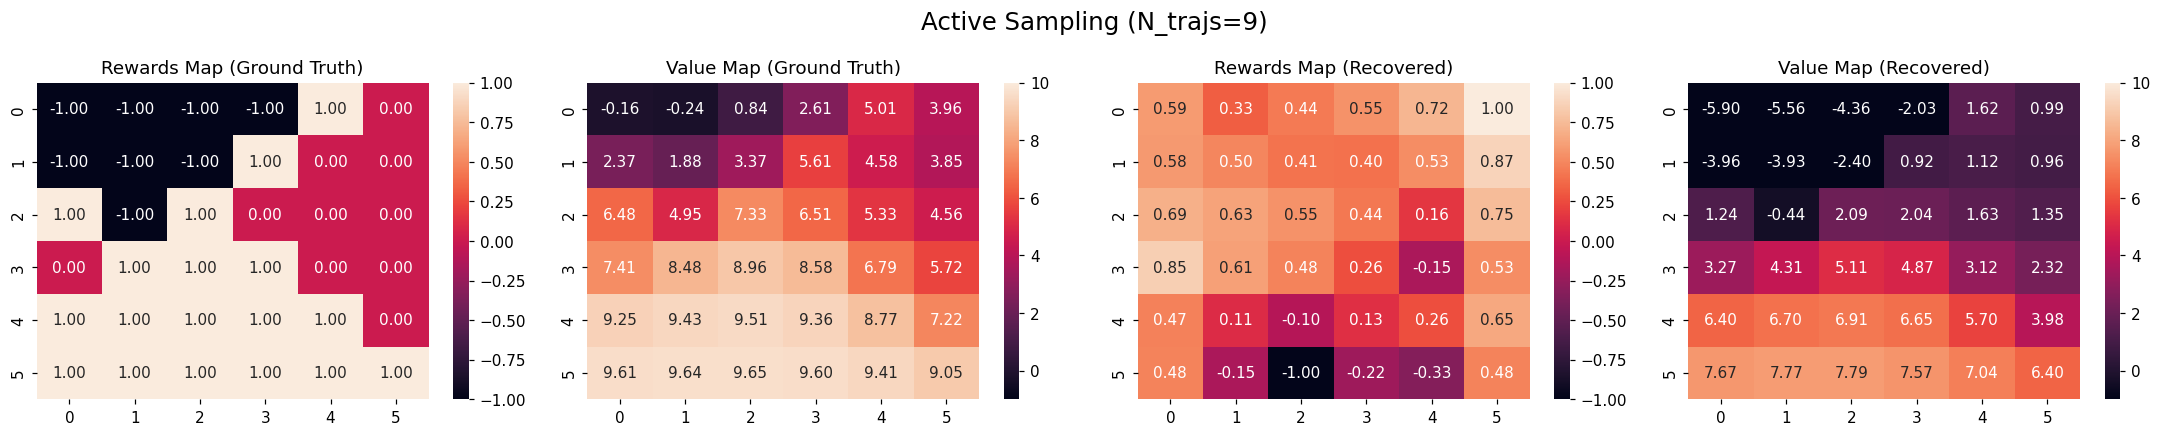

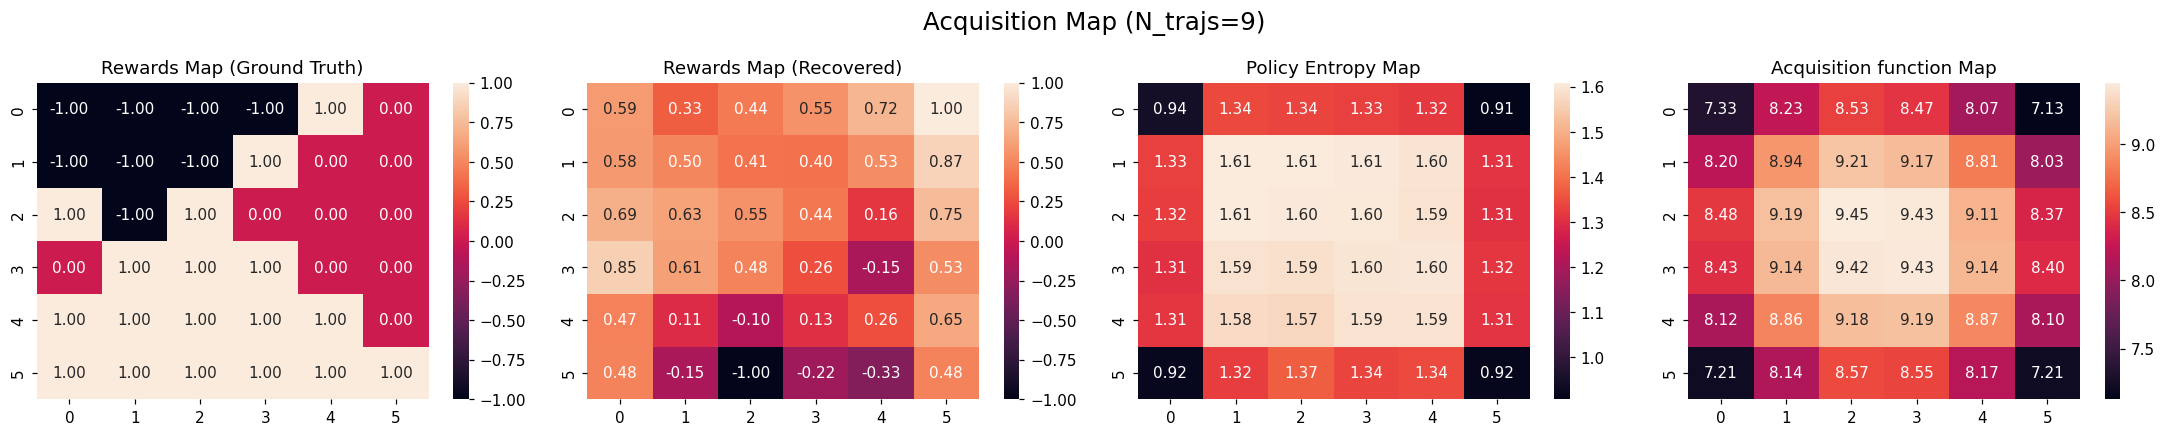

In [11]:
visualizer = Visualizer(history_deepmaxent_active, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)
visualizer.draw_acq_maps(search_idx)

## Random

In [85]:
DEEP_MAXENT_RANDOM_ARGS = """
--exp_name deepmaxent_random
--type object
--n_objects 7
--n_colours 4
--height 6
--width 6
--gamma 0.8
--act_random 0.3
--n_trajs 10
--l_traj 6
--learning_rate 0.001
--n_iters 50
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 2.0
--weight_decay 1.0
--hiddens 16 16
--device cuda
--seed 0
"""

# becareful of learning rate will cause nan
args = parse_args_str(PARSER, DEEP_MAXENT_RANDOM_ARGS)
print(args.exp_name)
history_deepmaxent_random = run_deepmaxent_irl(args, init_start_pos=init_start_pos)

deepmaxent_random
[INFO] Initialize Object World
[INFO] Getting ground truth values and policy via value iteration
[INFO] Initialize trajectories
[INFO - n_trajs:1] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:1--
[[ 0.4805  0.1001 -0.2092 -0.3895 -0.4329 -0.2077]
 [ 0.2265 -0.1351 -0.5152 -0.7362 -1.     -0.5341]
 [ 0.2204 -0.0952 -0.6887 -0.7428 -0.7547 -0.539 ]
 [ 0.2788  0.0657 -0.3254 -0.3931 -0.3173 -0.1154]
 [ 0.6383  0.3067  0.0213  0.0904  0.1368  0.3295]
 [ 1.      0.7553  0.6426  0.5983  0.5567  0.7669]]
[INFO - n_trajs:1] Policy evaluation
-- evd = 0.000000 ---
[INFO - n_trajs:1] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 2]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 1 2 5]]
[INFO - n_trajs:2] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:2--
[[ 0.6715  0.3637  0.1906  0.2374  0.5632  1.    ]
 [ 0.2794 -0.0439 -0.3614 -0.1572  0.189   0.7986]
 [-0.16   -0.2273 -1.     -0.3631  0.2475  0.8059]
 [-0.741  -0.287  -0.4869 -0.128   0.3569  0.6741]
 [-0.2445 -0.3053 -0.695  -0.0596  0.188   0.5599]
 [ 0.2457  0.0061 -0.0354  0.1569 -0.0655  0.5473]]
[INFO - n_trajs:2] Policy evaluation
-- evd = 0.000000 ---
[INFO - n_trajs:2] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 2]
 [0 2 1 1 0 1]
 [1 1 0 0 0 1]
 [0 0 0 1 2 5]]
[INFO - n_trajs:3] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:3--
[[-0.0146 -0.1718 -0.1361 -0.0919 -0.1186  0.2177]
 [-0.6767 -0.566  -0.509  -0.5852 -1.     -0.4364]
 [-0.3382 -0.4122 -0.614  -0.7602 -0.9222 -0.9039]
 [-0.0112 -0.1264 -0.3507 -0.5608 -0.6458 -0.5713]
 [ 0.4961  0.1671 -0.1778 -0.1915 -0.3706 -0.2158]
 [ 1.      0.7101  0.5417  0.3259 -0.0942  0.2373]]
[INFO - n_trajs:3] Policy evaluation
-- evd = 0.000000 ---
[INFO - n_trajs:3] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 3 2 2]
 [0 2 1 1 0 1]
 [1 1 0 0 0 1]
 [0 0 0 1 2 5]]
[INFO - n_trajs:4] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:4--
[[ 0.3119 -0.0324 -0.2023 -0.2709 -0.2765  0.0701]
 [-0.1597 -0.4108 -0.6306 -0.7445 -1.     -0.453 ]
 [-0.1761 -0.387  -0.8498 -0.8549 -0.8619 -0.6638]
 [-0.1321 -0.1534 -0.3939 -0.5255 -0.5201 -0.4139]
 [ 0.4217  0.1256 -0.3055 -0.2322 -0.3428 -0.1684]
 [ 1.      0.6243  0.3758  0.2047 -0.1744  0.1615]]
[INFO - n_trajs:4] Policy evaluation
-- evd = 0.000000 ---
[INFO - n_trajs:4] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 3 2 2]
 [0 2 1 1 0 1]
 [1 2 1 1 1 2]
 [0 1 0 1 2 5]]
[INFO - n_trajs:5] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:5--
[[ 0.0988 -0.1364 -0.1118  0.119   0.3276  0.7697]
 [-0.4628 -0.5981 -0.6225 -0.3743 -0.1838  0.4068]
 [-0.7481 -0.6896 -1.     -0.5548 -0.2014  0.2316]
 [-0.9971 -0.4877 -0.3341 -0.1995  0.0851  0.4481]
 [-0.3545 -0.1265  0.0577  0.1956  0.3388  0.6772]
 [ 0.3371  0.41    0.6256  0.6723  0.6014  1.    ]]
[INFO - n_trajs:5] Policy evaluation
-- evd = 0.000000 ---
[INFO - n_trajs:5] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 2 3 2 2]
 [1 3 2 1 0 1]
 [1 2 1 1 1 2]
 [0 1 0 1 2 5]]
[INFO - n_trajs:6] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:6--
[[ 0.5218  0.1688  0.0918  0.2286  0.4932  1.    ]
 [-0.2376 -0.4087 -0.5339 -0.3705 -0.2738  0.3406]
 [-0.3115 -0.4327 -1.     -0.7315 -0.4536 -0.1513]
 [-0.3755 -0.2636 -0.5637 -0.5172 -0.2727 -0.0109]
 [ 0.269  -0.0555 -0.5766 -0.2115 -0.2178  0.1335]
 [ 0.9188  0.541   0.3735  0.3087 -0.1866  0.4501]]
[INFO - n_trajs:6] Policy evaluation
-- evd = 0.000000 ---
[INFO - n_trajs:6] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 2 3 2 2]
 [1 3 2 1 0 2]
 [1 2 1 1 1 7]
 [0 1 0 1 2 5]]
[INFO - n_trajs:7] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:7--
[[ 0.4836  0.2039  0.1033  0.1394  0.3338  0.9536]
 [-0.1491 -0.3121 -0.5359 -0.5993 -0.8451  0.3879]
 [-0.1519 -0.278  -1.     -0.7883 -0.4245  0.2726]
 [-0.1411 -0.0535 -0.3461 -0.3087 -0.0132  0.3024]
 [ 0.4634  0.1499 -0.4015 -0.0105 -0.0086  0.3448]
 [ 1.      0.662   0.4834  0.4289 -0.0376  0.5476]]
[INFO - n_trajs:7] Policy evaluation
-- evd = 0.000000 ---
[INFO - n_trajs:7] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 2 3 2 2]
 [1 3 2 1 2 6]
 [1 2 1 1 1 7]
 [0 1 0 1 2 5]]
[INFO - n_trajs:8] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:8--
[[ 0.654   0.2901  0.1095  0.0826  0.1707  0.59  ]
 [ 0.0776 -0.2156 -0.5066 -0.5542 -0.611   0.0795]
 [-0.137  -0.2952 -1.     -0.7394 -0.5064 -0.1468]
 [-0.3407 -0.1081 -0.3487 -0.3345 -0.1186  0.2   ]
 [ 0.3406  0.2    -0.0115  0.153   0.2279  0.5339]
 [ 1.      0.7712  0.7278  0.6984  0.5009  0.9115]]
[INFO - n_trajs:8] Policy evaluation
-- evd = 0.000000 ---
[INFO - n_trajs:8] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 3 2 1 0]
 [0 1 0 0 0 0]
 [0 1 2 3 2 2]
 [1 3 2 1 2 6]
 [1 2 1 1 1 7]
 [0 1 0 1 2 5]]
[INFO - n_trajs:9] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:9--
[[ 0.5503  0.3573  0.2858  0.2242  0.0097 -0.0329]
 [ 0.0915  0.0019 -0.0894 -0.209  -0.4967 -0.4918]
 [ 0.0734 -0.03   -0.3952 -0.4053 -0.6971 -1.    ]
 [ 0.0311  0.1806  0.0937 -0.144  -0.3362 -0.2794]
 [ 0.5523  0.5316  0.5728  0.3646  0.2795  0.3676]
 [ 0.9553  0.9511  1.      0.873   0.82    0.9159]]
[INFO - n_trajs:9] Policy evaluation
-- evd = 0.000000 ---
[INFO - n_trajs:9] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 3 2 1 0]
 [0 1 0 0 0 0]
 [0 1 2 3 2 2]
 [1 3 2 2 2 6]
 [1 3 2 3 2 7]
 [0 1 0 1 2 5]]
[INFO - n_trajs:10] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:10--
[[-0.1852 -0.3307 -0.3218 -0.302  -0.5077 -0.3941]
 [-0.5833 -0.592  -0.5774 -0.6609 -1.     -0.6942]
 [-0.4967 -0.5183 -0.6284 -0.6206 -0.7941 -0.7323]
 [-0.3663 -0.1811 -0.0605 -0.2224 -0.3217 -0.1739]
 [ 0.1977  0.3047  0.5776  0.3283  0.299   0.4193]
 [ 0.7313  0.829   1.      0.8843  0.914   0.9914]]
[INFO - n_trajs:10] Policy evaluation
-- evd = 0.000000 ---


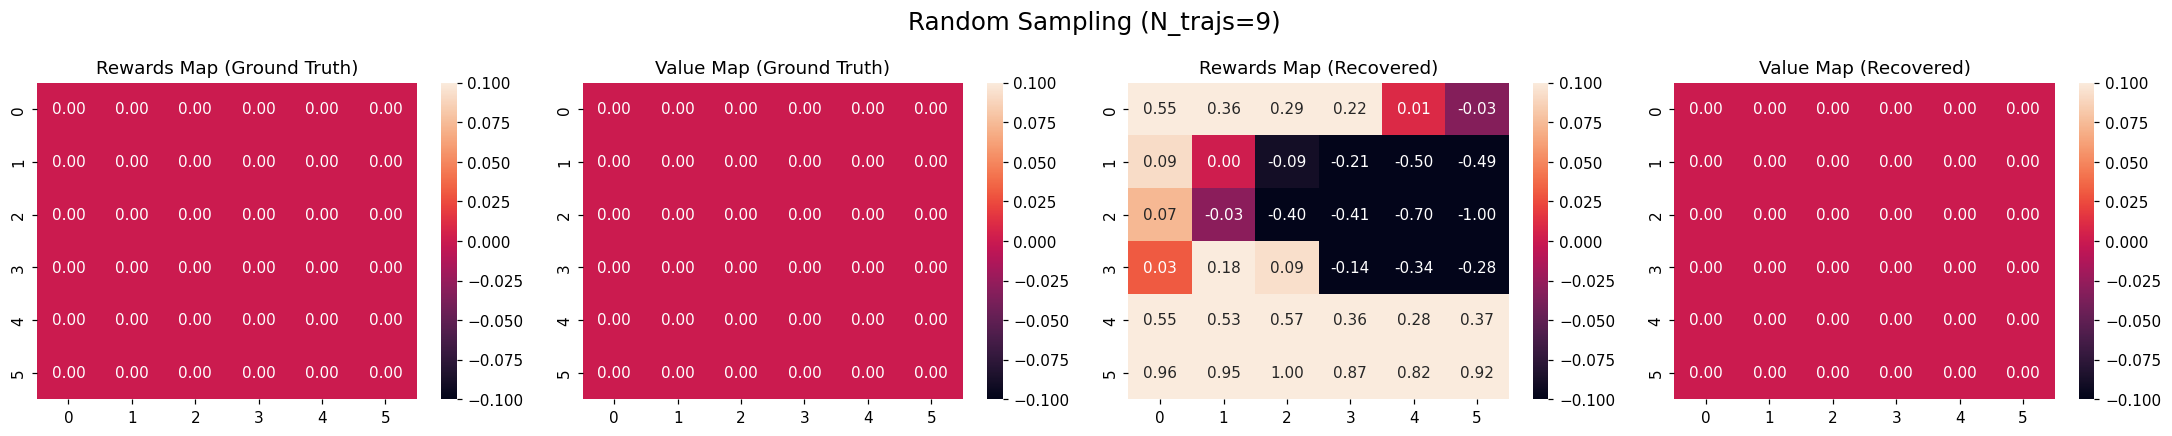

In [87]:
visualizer = Visualizer(history_deepmaxent_random, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)